# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':[16,8]},font_scale=1.3)

# Read File and view data details

In [2]:
loan = pd.read_csv('loan_data.csv')

In [3]:
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
for col in loan.columns:
    print(loan[col].value_counts())
    print('*' * 50)

1    7710
0    1868
Name: credit.policy, dtype: int64
**************************************************
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
**************************************************
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1941      1
0.1741      1
0.1620      1
0.1746      1
0.1756      1
Name: int.rate, Length: 249, dtype: int64
**************************************************
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
248.43     1
181.57     1
197.18     1
515.46     1
258.68     1
Name: installment, Length: 4788, dtype: int64
**************************************************
11.002100    308
10.819778    248
10.596635    224
10.308953    224
10.714418    221
            ... 
9.229358       1
10.381087      1
10.4

No need for Cleaning or Filling data as there isn't ant missing data.

# Data Analysis

In [8]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


for col in loan.columns:
    print(loan[col].value_counts())
    print('*' * 50)

## Dist Plot

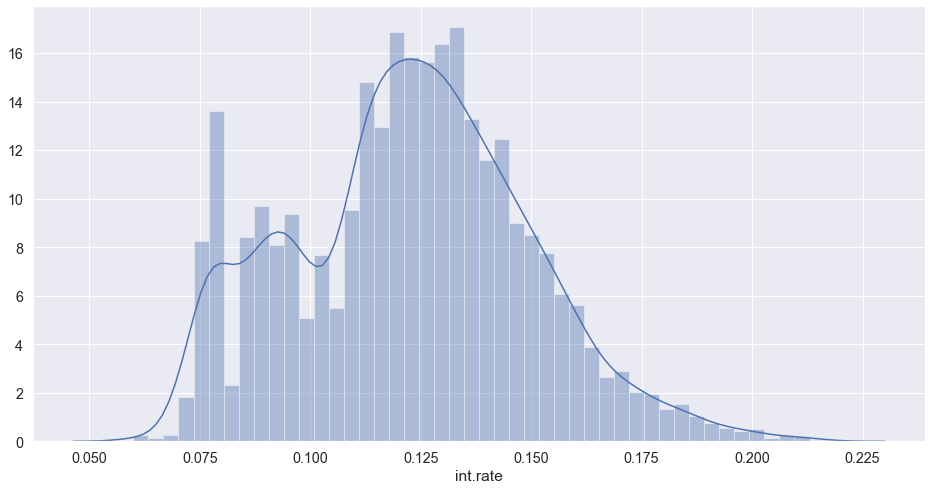

In [9]:
sns.distplot(loan['int.rate'])

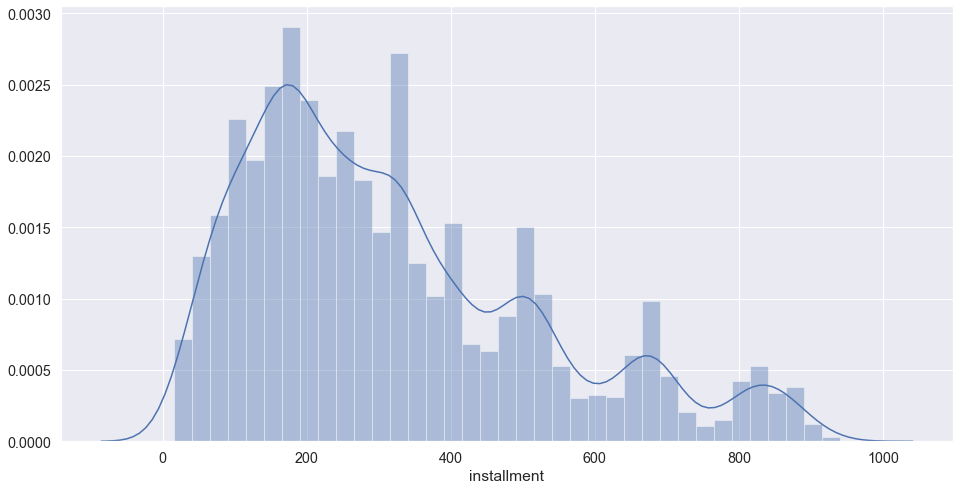

In [10]:
sns.distplot(loan['installment'])

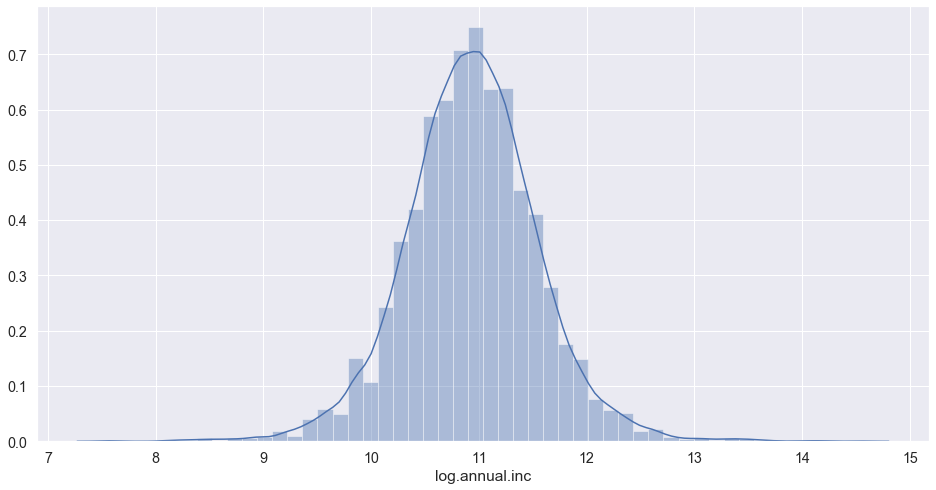

In [11]:
sns.distplot(loan['log.annual.inc'])

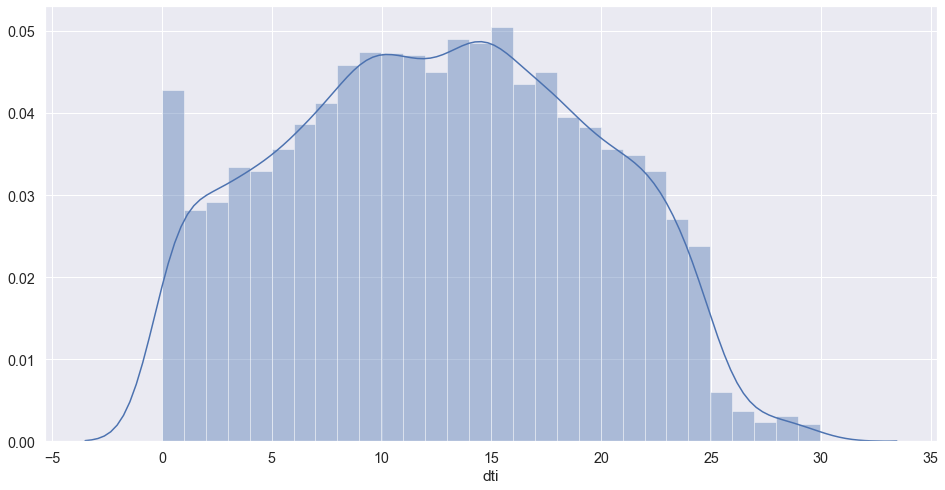

In [12]:
sns.distplot(loan['dti'])

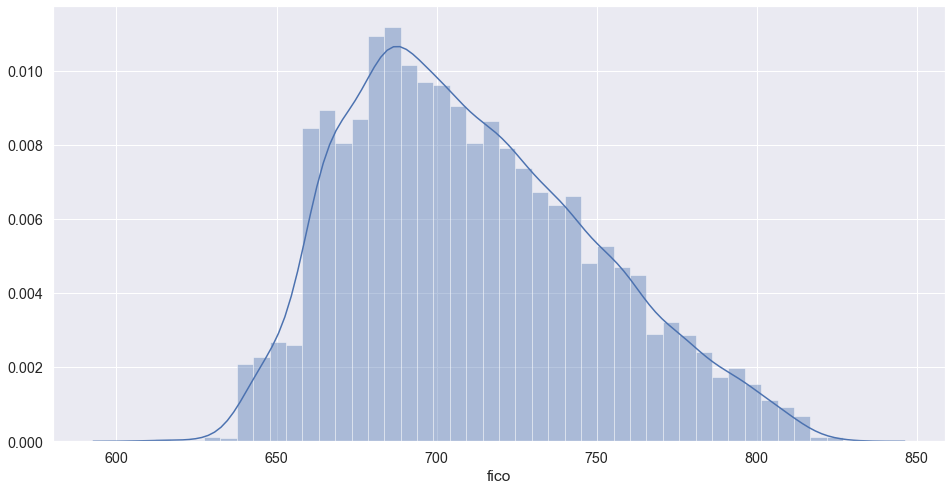

In [13]:
sns.distplot(loan['fico'])

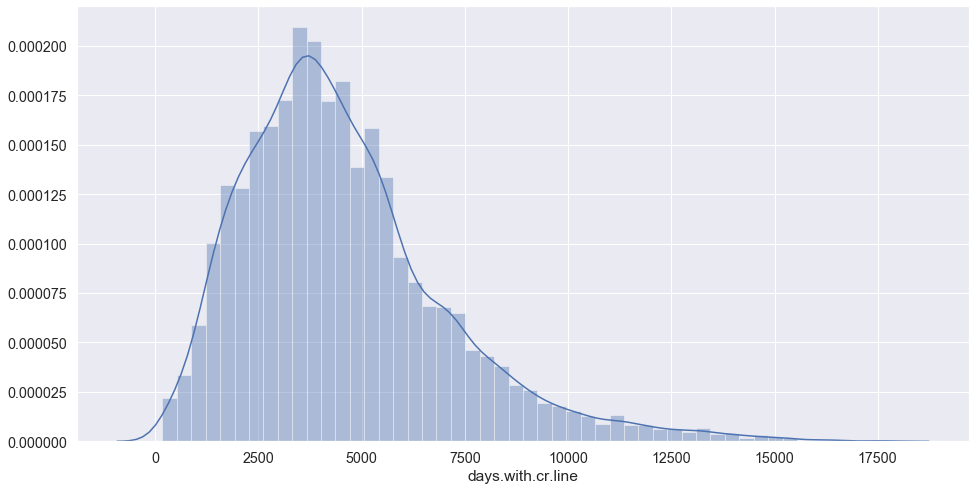

In [14]:
sns.distplot(loan['days.with.cr.line'])

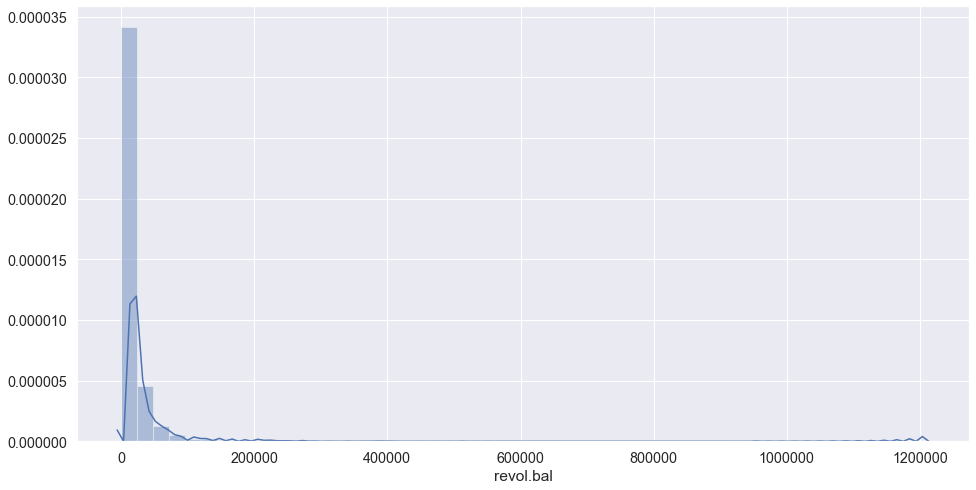

In [15]:
sns.distplot(loan['revol.bal'])

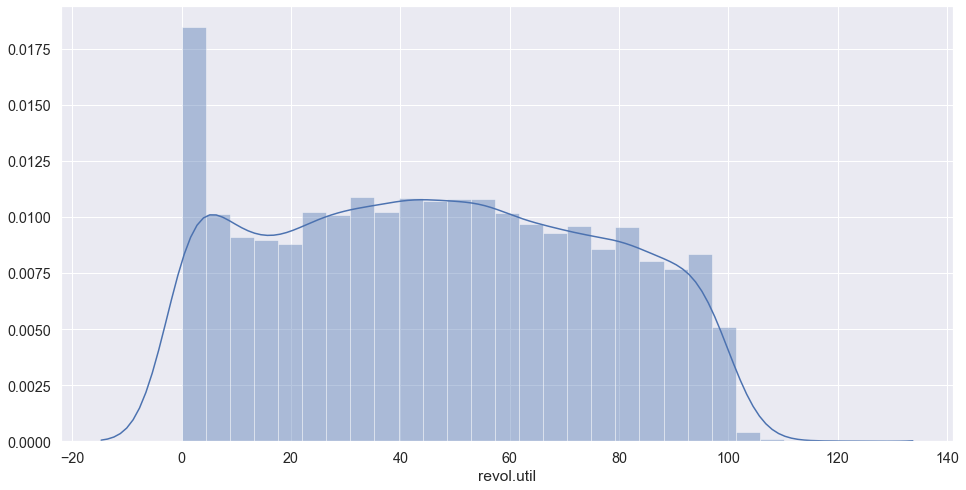

In [16]:
sns.distplot(loan['revol.util'])

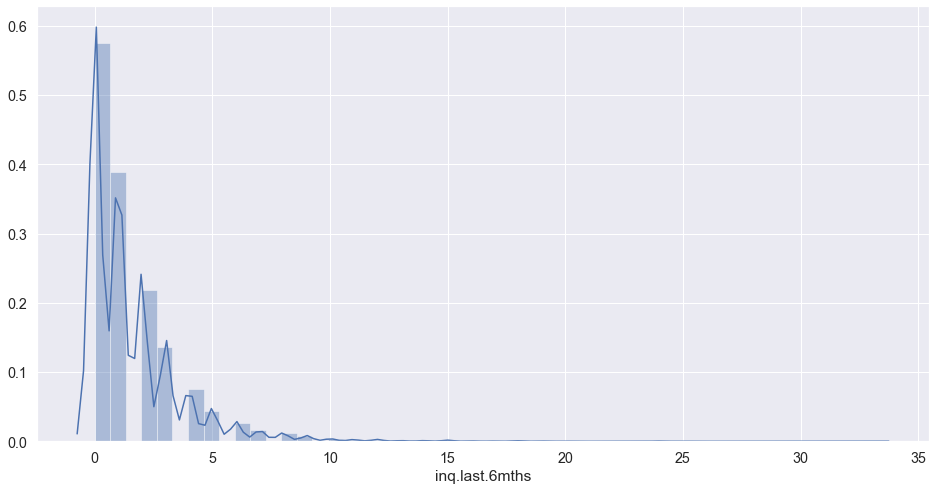

In [17]:
sns.distplot(loan['inq.last.6mths'])

## Count Plot

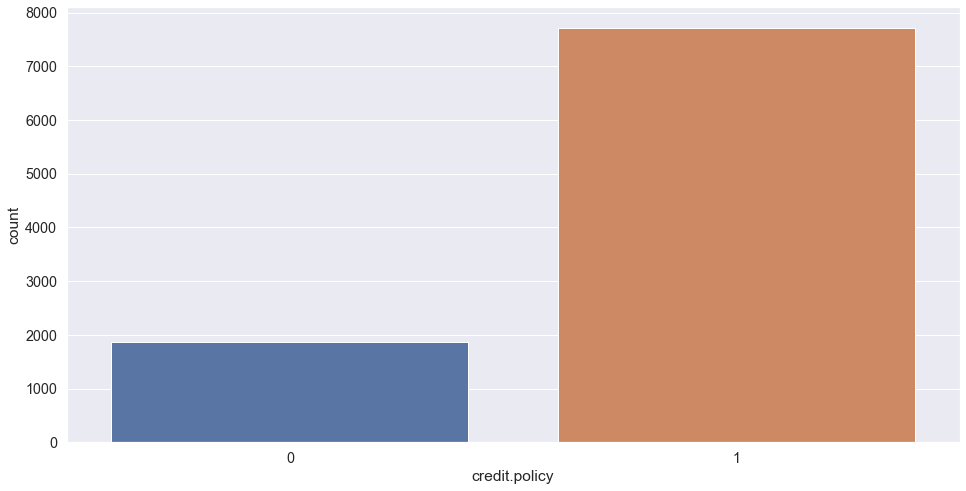

In [18]:
sns.countplot(loan['credit.policy'])

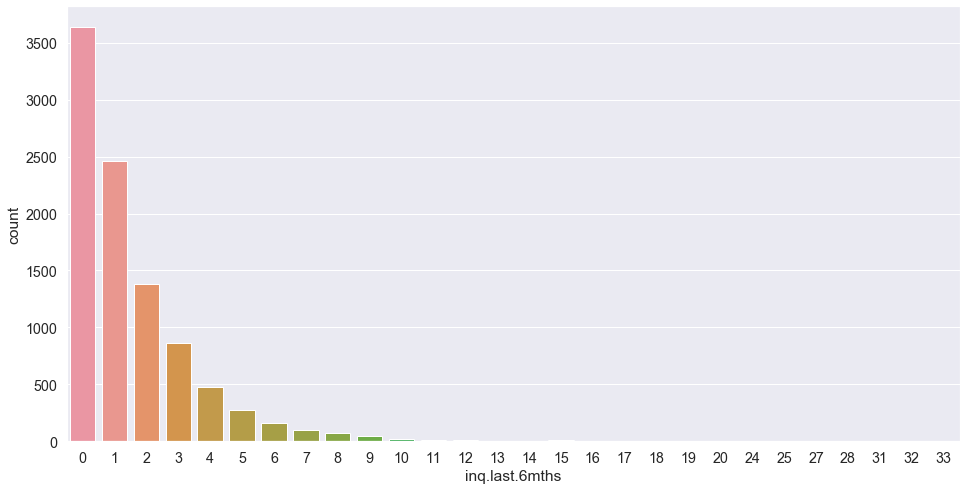

In [19]:
sns.countplot(loan['inq.last.6mths'])

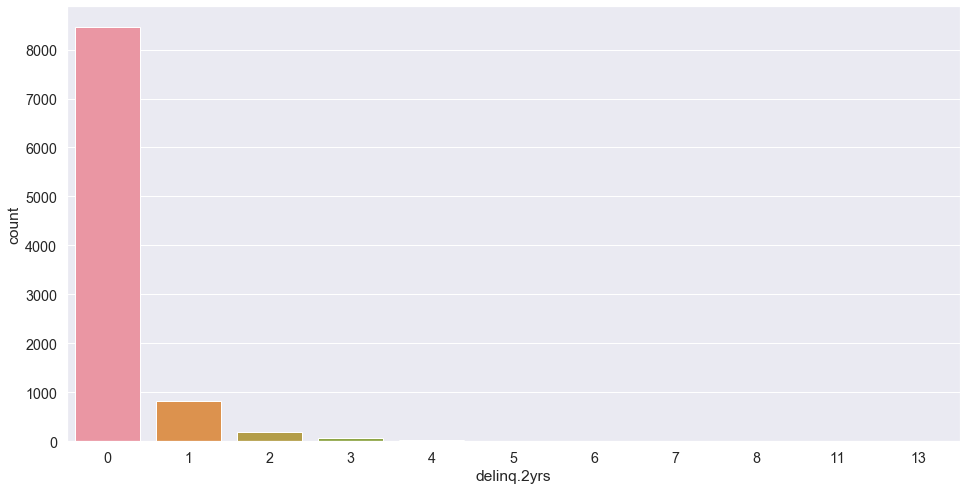

In [20]:
sns.countplot(loan['delinq.2yrs'])

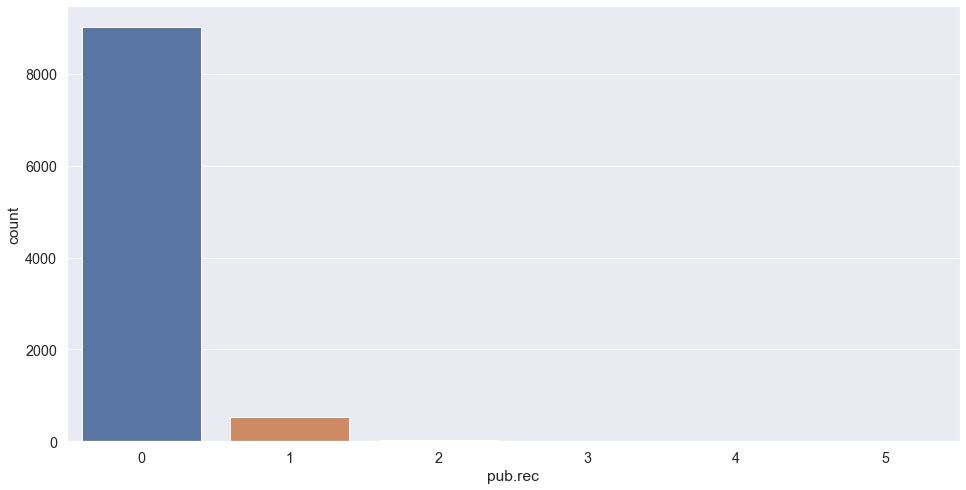

In [21]:
sns.countplot(loan['pub.rec'])

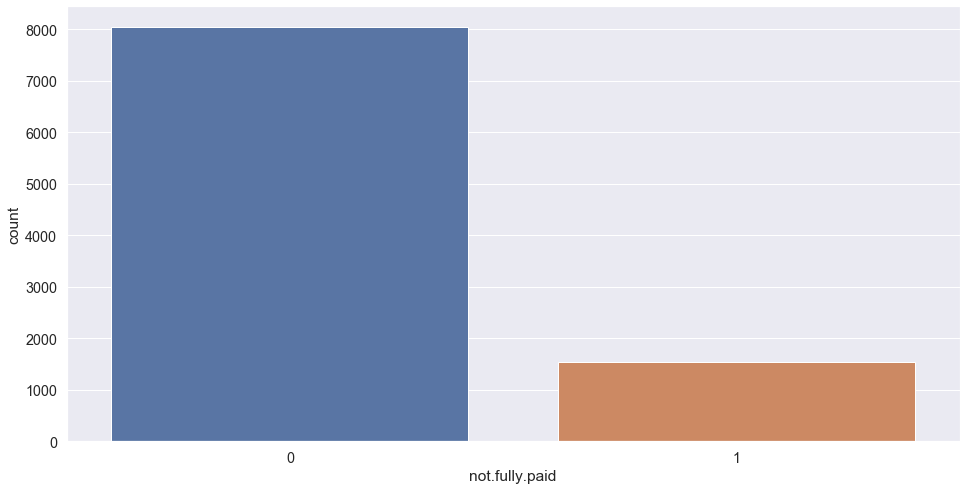

In [22]:
sns.countplot(loan['not.fully.paid'])

## Joint Plot

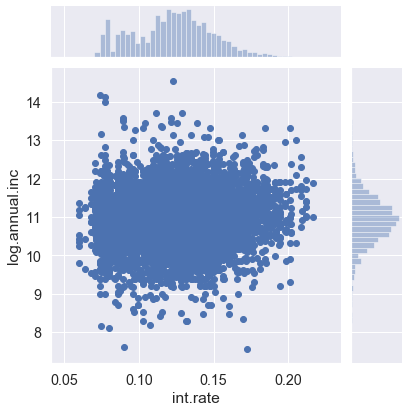

In [23]:
sns.jointplot(x=loan['int.rate'],y=loan['log.annual.inc'])

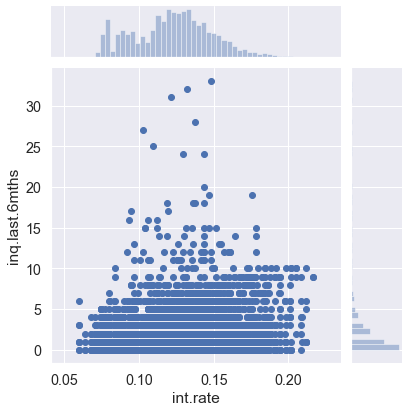

In [24]:
sns.jointplot(x=loan['int.rate'],y=loan['inq.last.6mths'])

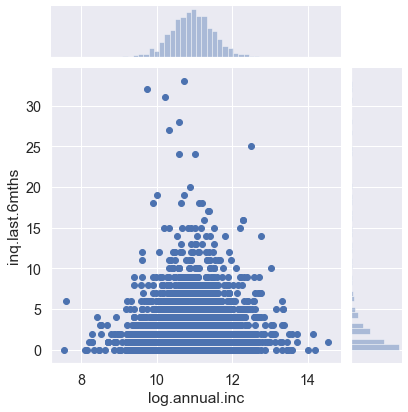

In [25]:
sns.jointplot(x=loan['log.annual.inc'],y=loan['inq.last.6mths'])

## Box Plot

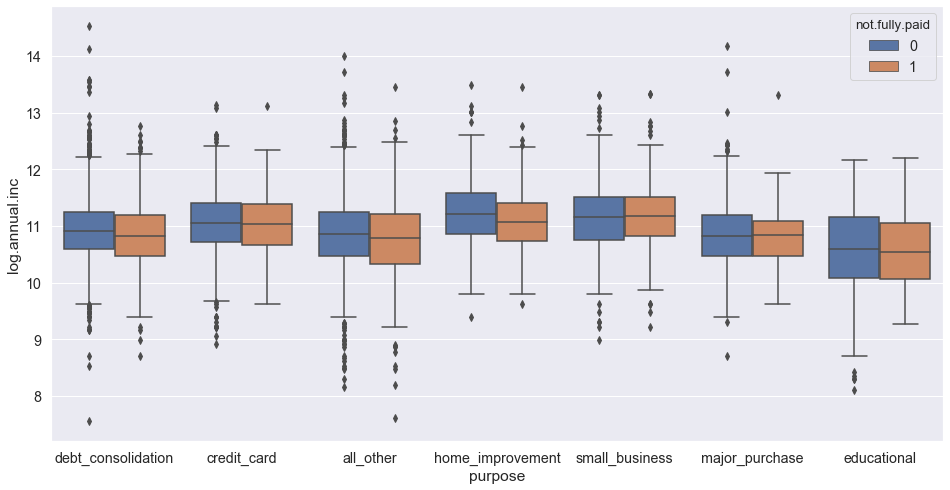

In [26]:
sns.boxplot(x=loan['purpose'],y=loan['log.annual.inc'],hue=loan['not.fully.paid'])

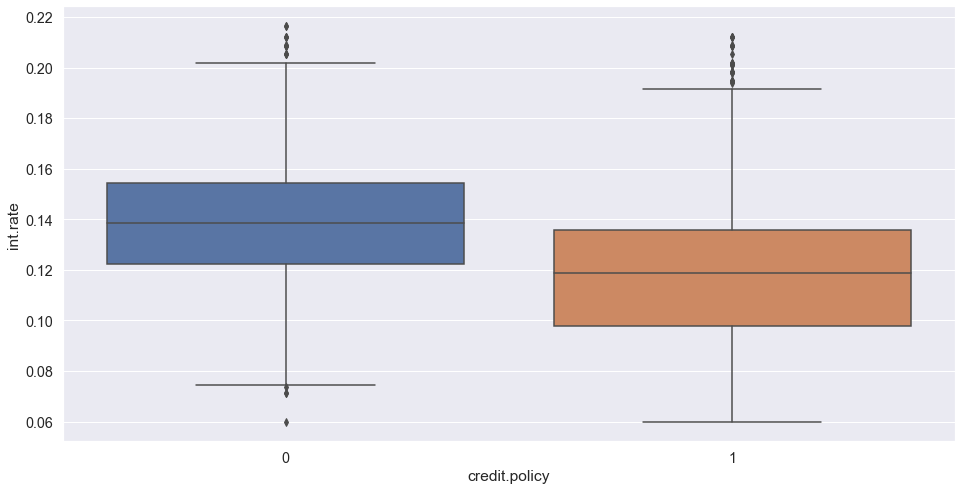

In [27]:
sns.boxplot(x=loan['credit.policy'],y=loan['int.rate'])

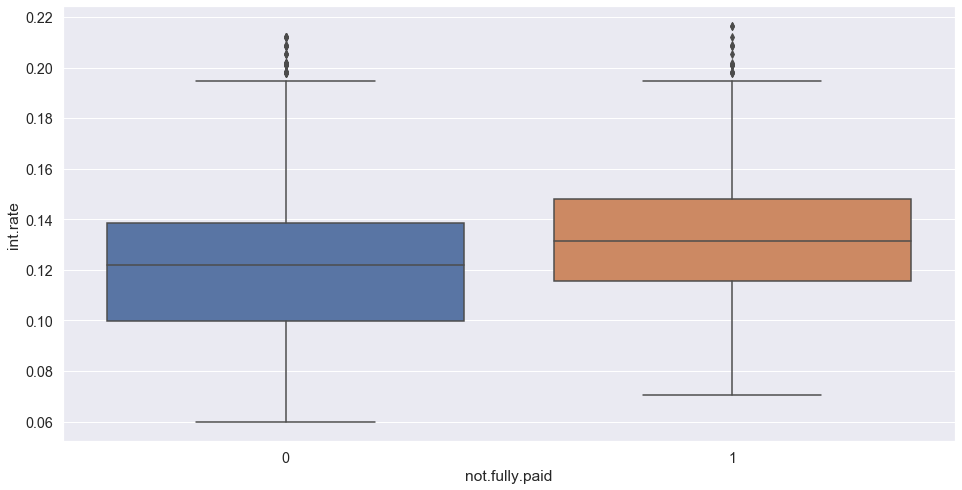

In [28]:
sns.boxplot(x=loan['not.fully.paid'],y=loan['int.rate'])

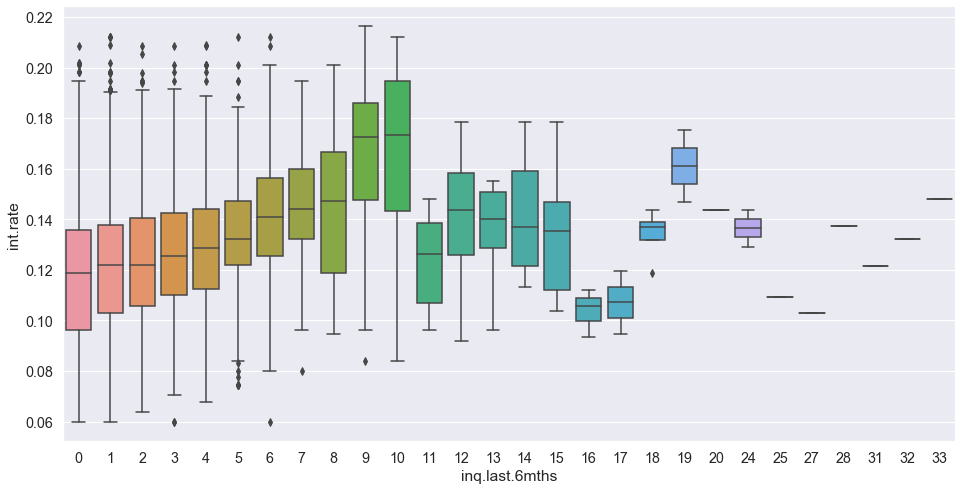

In [29]:
sns.boxplot(x=loan['inq.last.6mths'],y=loan['int.rate'])

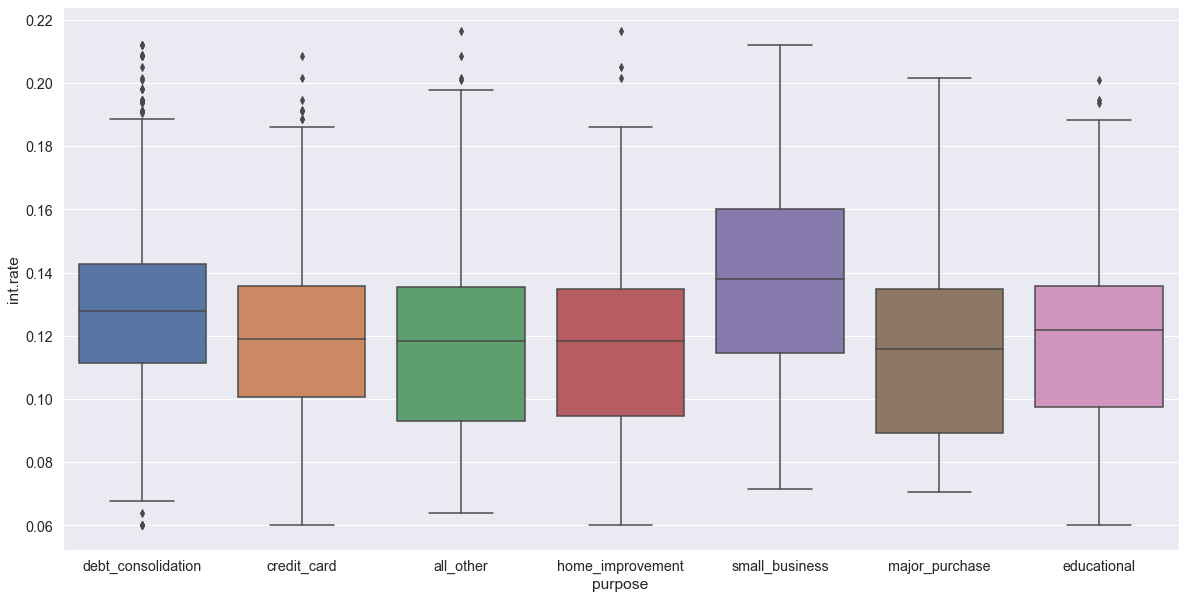

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x=loan['purpose'],y=loan['int.rate'])

## Heat Map

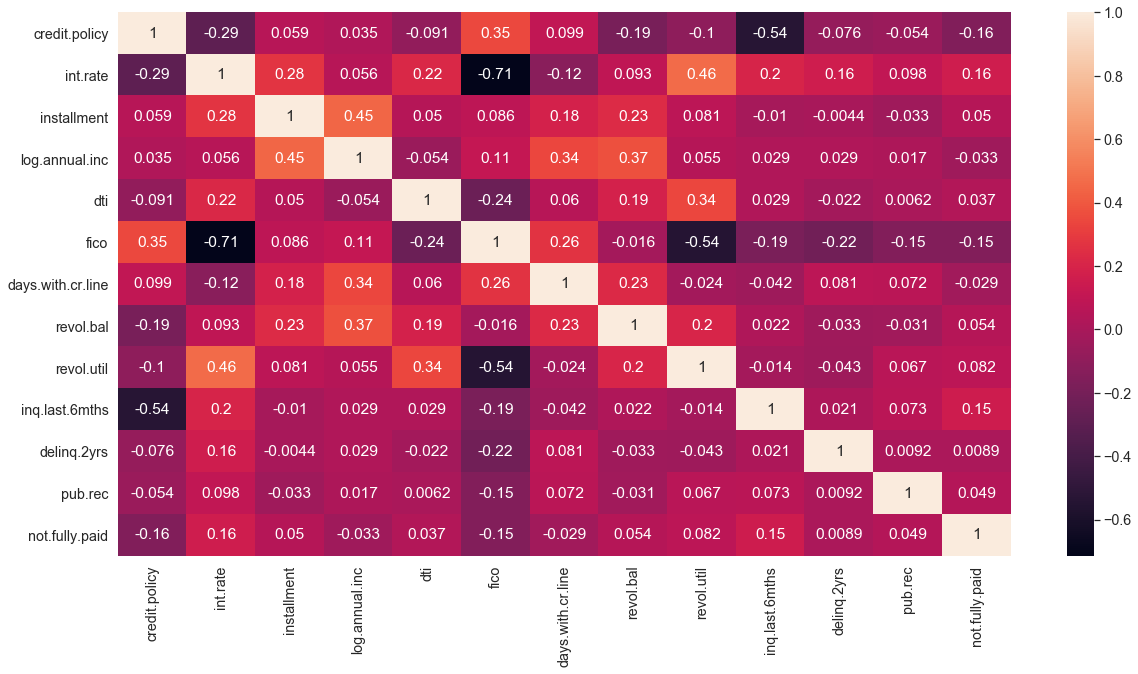

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(loan.corr(),annot=True)

# Working With Categorical Data

In [32]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Categorical Data** 
1. Ordinal (Need Mapping) 

2. Ordinal (Already Mapped)
    1. pub.rec (0-5)

    
3. Nominal
    1. purpose

In [33]:
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

In [34]:
loan

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


# 5.Split Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = loan.drop('not.fully.paid',axis=1)
y = loan['not.fully.paid']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [38]:
print(X_train.shape , X_test.shape , y_train.shape, y_test.shape)

(7662, 18) (1916, 18) (7662,) (1916,)


# Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()

In [41]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)